In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# MNIST 数据集

In [16]:
from keras.datasets import mnist     # 加载MNIST 手写数字分类数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

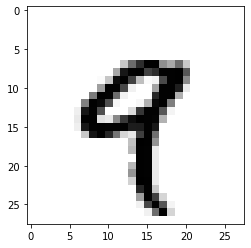

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[4],cmap=plt.cm.binary)
plt.show()

In [17]:
train_images.shape        # train_images : array(60000, 28, 28)   dtype('uint8')  0-255     训练数据

(60000, 28, 28)

In [18]:
train_labels.shape        # train_labels : array(60000,)         dtype('uint8')   0-9     

(60000,)

In [19]:
test_images.shape        # test_images : array(10000, 28, 28)   dtype('uint8')  0-255          测试数据

(10000, 28, 28)

In [20]:
test_labels.shape        # test_labels : array(10000,)         dtype('uint8')   0-9  

(10000,)

In [7]:
train_images = train_images.reshape((60000, 28 * 28))  # 图像数据处理    array(60000, 28, 28) -> array(60000, 28 * 28)
train_images = train_images.astype('float32') / 255    #                 dtype('uint8')       -> dtype('float32')
test_images = test_images.reshape((10000, 28 * 28))    #                 [0,255]              -> [0,1]  
test_images = test_images.astype('float32') / 255

In [12]:
from keras.utils import to_categorical                # 标签数据处理    array(60000,)          -> array(60000, 10)
train_labels = to_categorical(train_labels)            #                dtype('uint8')         -> dtype('float32')
test_labels = to_categorical(test_labels)              #                [0,9]                  -> [0,1]

# 网络

In [64]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',                 # 优化器（optimizer）
                loss='categorical_crossentropy',     # 损失函数（loss） 
                metrics=['accuracy'])                # 监控指标（metric）

network.fit(train_images, train_labels, epochs=5, batch_size=128)  # 训练网络

In [69]:
test_loss, test_acc = network.evaluate(test_images, test_labels)   # 评估网络
test_loss , test_acc

10000/10000 [==============================] - 0s 32us/step


(0.06708235375082586, 0.979)